# Prerequisite
    - Run the cell below to ensure you have the required python packages for data agregation and analysis

In [1]:
!pip install requests
!pip install BeautifulSoup
!pip install selenium
!pip install pandas

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [7 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\C77818\AppData\Local\Temp\pip-install-6a13t0fq\beautifulsoup_b8378cd73f504153a0443db51fe726ce\setup.py", line 3
      "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                     ^^
  SyntaxError: invalid syntax
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not

  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/9.6 MB 9.4 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.6 MB 10.5 MB/s eta 0:00:01
   ------- -------------------------------- 1.8/9.6 MB 14.2 MB/s eta 0:00:01
   ----------- ---------------------------- 2.7/9.6 MB 14.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.6/9.6 MB 16.4 MB/s eta 0:00:01
   ------------------- -------------------- 4.6/9.6 MB 17.2 MB/s eta 0:00:01
   ------------------------ --------------- 5.9/9.6 MB 18.7 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 19.0 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 19.0 MB/s eta 0:00:01
   ------------------------------ --------- 7.2/9.6 MB 16.0 MB/s eta 0:00:01
   ------------------------------------ --- 8.6/9.6 MB 17.3 MB/s eta 0:00:01
   ---------------------

# Scrape

In [34]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import pandas as pd

# getting the course number and college department tag
dept = input("Enter the college dept (ex. ECEN): ")
number = input("Please enter the course number (ex. 248): ")

# some basic error checking
try:
    cn = int(number)
except:
    print("Looks like you entered a non-numeric course number, please enter a numeric number and try again")
    cn = input("Re-enter the course number (ex. 303): ")

# Initialize the selenium driver to actively parse the data
driver = webdriver.Chrome()

# Go to the website
driver.get(f'https://anex.us/grades/?dept={dept}&number={number}')

# Wait for the data to load
driver.implicitly_wait(10)

# Find the table containing the grade data
table = driver.find_element(by="id", value="tableDiv")
html = table.get_attribute("innerHTML")
df = pd.read_html(html)[0]

# Close the driver
driver.close()

Enter the college dept (ex. ECEN):  ECEN
Please enter the course number (ex. 248):  340


C:\Users\C77818\AppData\Local\Temp\ipykernel_26228\268331361.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html)[0]


In [36]:
df.head

<bound method NDFrame.head of     Year Semester          Prof    GPA  Section   A   B   C  D   F  I  Q  S  \
0   2024   SPRING      ENJETI P  2.917      502  32  35  22  3   4  0  1  0   
1   2024   SPRING        CHEN X  3.289      501  37  43   9  1   0  0  0  0   
2   2024   SPRING    CHEN X (H)  4.000      200   7   0   0  0   0  0  0  0   
3   2023     FALL        CHEN X  3.359      502  39  47   6  0   0  0  0  0   
4   2023     FALL       DAVIS K  3.012      501  23  40  18  2   0  0  3  0   
5   2023   SPRING        JANG W  3.058      502  37  26  15  7   1  0  2  0   
6   2023   SPRING      ENJETI P  3.487      501  41  31   4  0   0  0  3  0   
7   2023   SPRING  ENJETI P (H)  3.857      200   6   1   0  0   0  0  0  0   
8   2022     FALL       DAVIS K  3.056      502  24  46  19  0   0  0  2  0   
9   2022     FALL       DAVIS K  2.976      501  21  44  18  1   1  0  2  0   
10  2022   SPRING    PEERZADA A  2.066      502   7  21  29  8  11  0  7  0   
11  2022   SPRING     

# Analysis

Text(0, 0.5, 'Q-drop #')

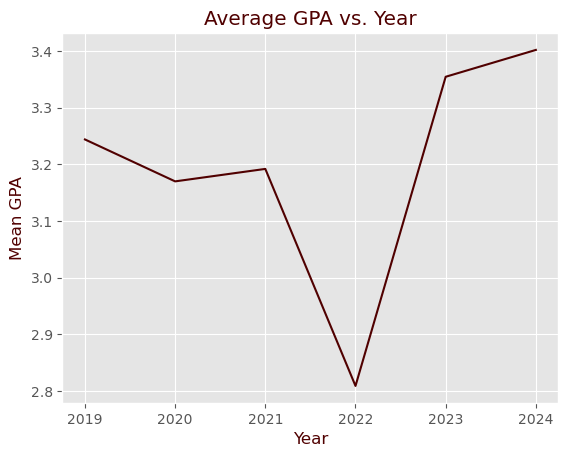

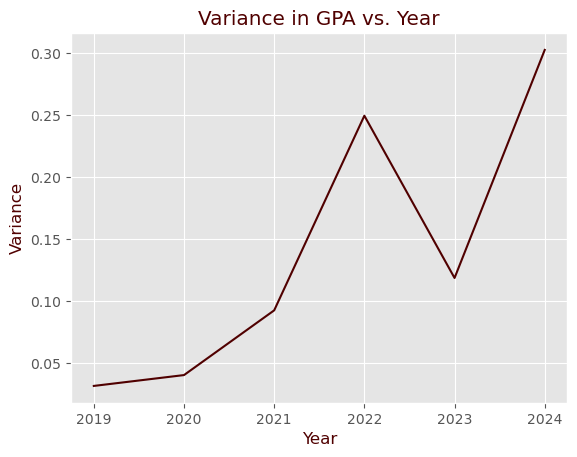

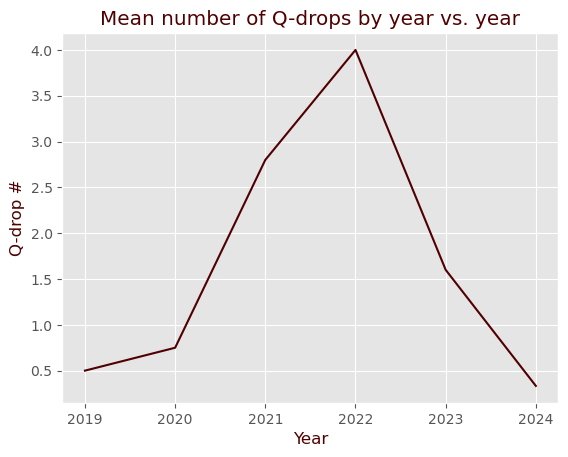

In [38]:
import matplotlib.pyplot as plt

maroon='#500000'
plt.style.use("ggplot")
year = df.groupby('Year')
mean_year = year['GPA'].mean()
var_year = year['GPA'].var()
q_year = year['Q'].mean()

plt.figure(1)
plt.plot(mean_year, c=maroon)
plt.xlabel('Year', c=maroon)
plt.ylabel('Mean GPA', c=maroon)
plt.title('Average GPA vs. Year', c=maroon)

plt.figure(2)
plt.plot(var_year, c=maroon)
plt.xlabel('Year', c=maroon)
plt.ylabel('Variance', c=maroon)
plt.title('Variance in GPA vs. Year', c=maroon)

plt.figure(3)
plt.plot(q_year, c=maroon)
plt.title('Mean number of Q-drops by year vs. year', c=maroon)
plt.xlabel('Year', c=maroon)
plt.ylabel('Q-drop #', c=maroon)